## Audio Processing Notebook

### Introduction:-
# This notebook demonstrates how to use the `AudioProcessor` class for various audio processing tasks such as detecting noise, reducing noise , and removing silence.

### Setup:-
# Import the necessary libraries and define the `AudioProcessor` class.

In [1]:
import numpy as np
import librosa
import noisereduce as nr
from pydub import AudioSegment
from pydub.silence import detect_nonsilent
import pandas as pd
import os
import matplotlib.pyplot as plt

/home/mohamed/.local/lib/python3.12/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# Define the AudioProcessor class


In [2]:
import os
import numpy as np
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display
import noisereduce as nr
import pandas as pd

class AudioProcessor:
    def __init__(self, dataframe):
        self.data = dataframe

    def read_audio(self, filepath, sr=None):
        """
        Read audio file from filepath using librosa.

        Parameters:
        - filepath (str): Path to the audio file.
        - sr (int or None): Sampling rate to load the audio file (optional).

        Returns:
        - audio (np.ndarray): Loaded audio data.
        - sr (int): Sampling rate of the loaded audio.
        """
        try:
            audio, sr = librosa.load(filepath, sr=sr)
            return audio, sr
        except Exception as e:
            print(f"Error reading audio file {filepath}: {e}")
            return None, None

    def normalize_audio(self, audio):
        """
        Normalize audio data to a standard amplitude range.

        Parameters:
        - audio (np.ndarray): Audio data.

        Returns:
        - audio_normalized (np.ndarray): Normalized audio data.
        """
        max_amp = np.max(np.abs(audio))
        if max_amp > 0:
            audio_normalized = audio / max_amp
        else:
            audio_normalized = audio
        return audio_normalized

    def resample_audio(self, audio, orig_sr, target_sr=16000):
        """
        Resample audio to a target sampling rate.

        Parameters:
        - audio (np.ndarray): Audio data.
        - orig_sr (int): Original sampling rate.
        - target_sr (int): Target sampling rate (default: 16000).

        Returns:
        - resampled_audio (np.ndarray): Resampled audio data.
        """
        resampled_audio = librosa.resample(audio, orig_sr=orig_sr, target_sr=target_sr)
        return resampled_audio

    def pre_emphasis(self, audio, pre_emphasis_coef=0.97):
        """
        Apply pre-emphasis filter to the audio.

        Parameters:
        - audio (np.ndarray): Audio data.
        - pre_emphasis_coef (float): Pre-emphasis coefficient (default: 0.97).

        Returns:
        - emphasized_audio (np.ndarray): Audio data with pre-emphasis applied.
        """
        emphasized_audio = np.append(audio[0], audio[1:] - pre_emphasis_coef * audio[:-1])
        return emphasized_audio

    def reduce_noise(self, audio, sr):
        """
        Reduce noise in audio using the noisereduce library.

        Parameters:
        - audio (np.ndarray): Audio data.
        - sr (int): Sampling rate of the audio.

        Returns:
        - reduced_noise_audio (np.ndarray): Noise-reduced audio data.
        """
        reduced_noise_audio = nr.reduce_noise(y=audio, sr=sr)
        return reduced_noise_audio

    def process_all_files(self, output_dir, target_sr=16000, pre_emphasis_coef=0.97):
        """
        Process all audio files listed in the dataset with various preprocessing steps and save them to the specified output directory.

        Parameters:
            - output_dir (str): Path to the directory where the processed audio files will be saved.
            - target_sr (int): Target sampling rate for resampling (default: 16000).
            - pre_emphasis_coef (float): Pre-emphasis coefficient (default: 0.97).

        This method iterates through each row in the dataset, extracts the audio file path, loads the file,
        applies preprocessing steps, and saves the processed file to the output directory.
        """
        for index, row in self.data.iterrows():
            audio_path = row['audio_path']
            output_path = os.path.join(output_dir, os.path.basename(audio_path))
            
            print(f"Processing file: {audio_path}")
            
            # Read audio file
            audio, sr = self.read_audio(audio_path)
            if audio is None:
                continue
            
            # Preprocessing steps
            audio = self.normalize_audio(audio)
            audio = self.resample_audio(audio, orig_sr=sr, target_sr=target_sr)
            audio = self.pre_emphasis(audio, pre_emphasis_coef=pre_emphasis_coef)
            audio = self.reduce_noise(audio, sr)
            
            # Save processed audio
            sf.write(output_path, audio, sr)
            # print(f"Processed audio saved at {output_path}")

    def plot_waveform(self, audio_path):
        """
        Plot the waveform of the audio file.

        Parameters:
        - audio_path (str): Path to the audio file.
        """
        # Load audio
        audio, sr = self.read_audio(audio_path)
        if audio is None:
            print(f"Failed to load audio from {audio_path}")
            return
        
        # Plot waveform
        plt.figure(figsize=(14, 5))
        librosa.display.waveshow(audio, sr=sr)
        plt.title('Waveform')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.show()

# Test on sample

Processing file: ./Data/test/train_sample_0.wav
Processing file: ./Data/test/train_sample_1.wav
Processing file: ./Data/test/train_sample_2.wav
Processing file: ./Data/test/train_sample_3.wav
Processing file: ./Data/test/train_sample_4.wav
Processing file: ./Data/test/train_sample_5.wav
Processing file: ./Data/test/train_sample_6.wav
Processing file: ./Data/test/train_sample_7.wav
Processing file: ./Data/test/train_sample_8.wav
Processing file: ./Data/test/train_sample_9.wav
Processing file: ./Data/test/train_sample_10.wav
Processing file: ./Data/test/train_sample_11.wav
Processing file: ./Data/test/train_sample_12.wav
Processing file: ./Data/test/train_sample_13.wav
Processing file: ./Data/test/train_sample_14.wav
Processing file: ./Data/test/train_sample_15.wav
Processing file: ./Data/test/train_sample_16.wav
Processing file: ./Data/test/train_sample_17.wav
Processing file: ./Data/test/train_sample_18.wav
Processing file: ./Data/test/train_sample_19.wav
Processing file: ./Data/test/t

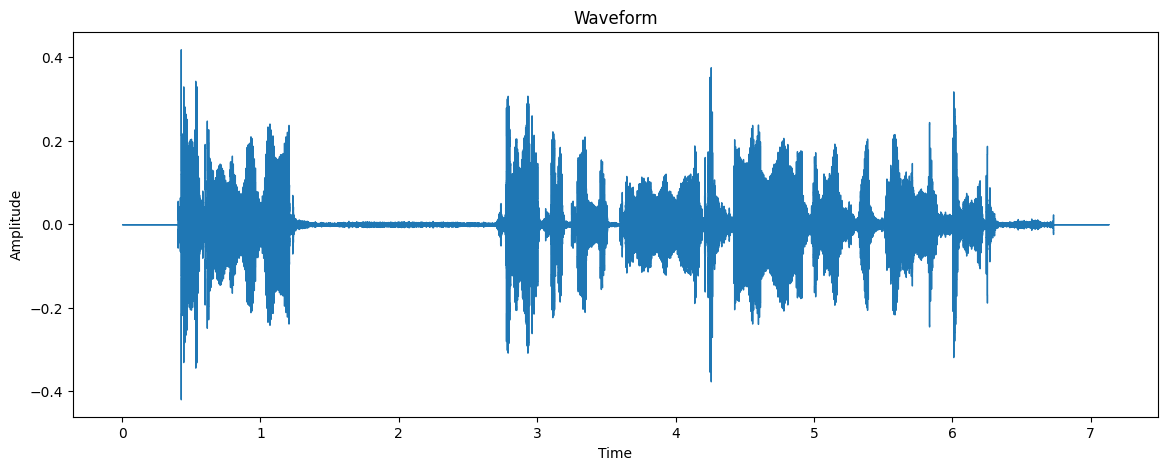

Plotting waveform for processed audio: ./Data/Clean_Data/train_sample_0.wav


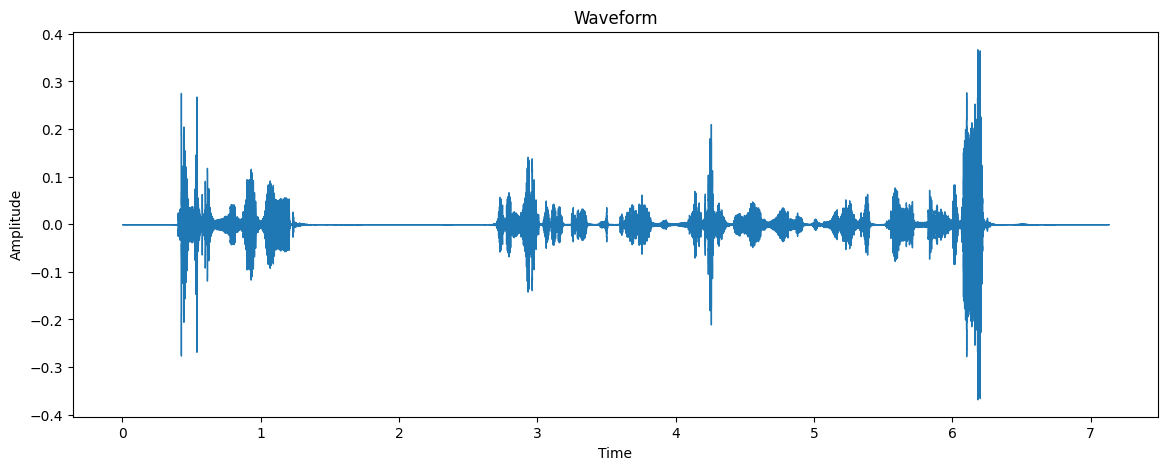

In [3]:

# Assuming train.csv is located in './Data/train.csv' and audio files are in './Data/test/'
train_df = pd.read_csv('./Data/train.csv')

# Update the audio paths to match the directory structure
train_audio_dir = './Data/test'
train_df['audio_path'] = train_df['audio'].apply(lambda x: os.path.join(train_audio_dir, x + '.wav'))

# Define the output directory for processed audio files
output_audio_dir = './Data/Clean_Data'

# Create the output directory if it doesn't exist
if not os.path.exists(output_audio_dir):
    os.makedirs(output_audio_dir)

# Instantiate the AudioProcessor with the training data
audio_processor = AudioProcessor(train_df)

# Process all files and save to the output directory
audio_processor.process_all_files(output_audio_dir)

# Plot waveforms before and after processing for the first audio file
original_audio_path = train_df['audio_path'][0]
processed_audio_path = os.path.join(output_audio_dir, os.path.basename(original_audio_path))

# Plot original audio waveform
print(f"Plotting waveform for original audio: {original_audio_path}")
audio_processor.plot_waveform(original_audio_path)

# Plot processed audio waveform
print(f"Plotting waveform for processed audio: {processed_audio_path}")
audio_processor.plot_waveform(processed_audio_path)

# Data Augmentation Section

In [5]:
import os
import pandas as pd
import numpy as np
import librosa
import soundfile as sf

# Define augmentation functions
def add_white_noise(signal, noise_percentage_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

def time_stretch(signal, time_stretch_rate):
    return librosa.effects.time_stretch(signal, rate=time_stretch_rate)

# Load the CSV file
csv_file = './Data/train.csv'
audio_directory = './Data/train/'
output_directory = './Data/train/'
df = pd.read_csv(csv_file)

# Ensure output directory exists
os.makedirs(output_directory, exist_ok=True)

# Prepare lists to hold new audio IDs and transcripts
new_audio_ids = []
new_transcripts = []

# Process each audio file
for index, row in df.iterrows():
    audio_id = row['audio']
    transcript = row['transcript']
    audio_path = os.path.join(audio_directory, f'{audio_id}.wav')
    
    if os.path.exists(audio_path):
        # Load the audio file
        signal, sr = librosa.load(audio_path, sr=None)
        
        # Perform augmentation
        augmented_signal_noise = add_white_noise(signal, noise_percentage_factor=0.05)
        augmented_signal_stretch9 = time_stretch(signal, time_stretch_rate=0.9)
        augmented_signal_stretch7 = time_stretch(signal, time_stretch_rate=0.7)
        
        # Save augmented audio files
        noise_audio_id = f'{audio_id}_noise'
        stretch_audio_id9 = f'{audio_id}_stretch9'
        stretch_audio_id7 = f'{audio_id}_stretch7'
        
        sf.write(os.path.join(output_directory, f'{noise_audio_id}.wav'), augmented_signal_noise, sr)
        sf.write(os.path.join(output_directory, f'{stretch_audio_id9}.wav'), augmented_signal_stretch9, sr)
        sf.write(os.path.join(output_directory, f'{stretch_audio_id7}.wav'), augmented_signal_stretch7, sr)
        
        # Add new audio IDs and transcripts to the lists
        new_audio_ids.extend([audio_id, noise_audio_id, stretch_audio_id9, stretch_audio_id7])
        new_transcripts.extend([transcript, transcript, transcript, transcript])

# Create new DataFrame and save to CSV
augmented_df = pd.DataFrame({'audio': new_audio_ids, 'transcript': new_transcripts})
augmented_csv_file = os.path.join(output_directory, 'augmented_data.csv')
augmented_df.to_csv(augmented_csv_file, index=False)

print(f'Augmented data saved to {augmented_csv_file}')

Augmented data saved to ./Data/train/augmented_data.csv


### Plot Sample Of Data After & Before Augmentation

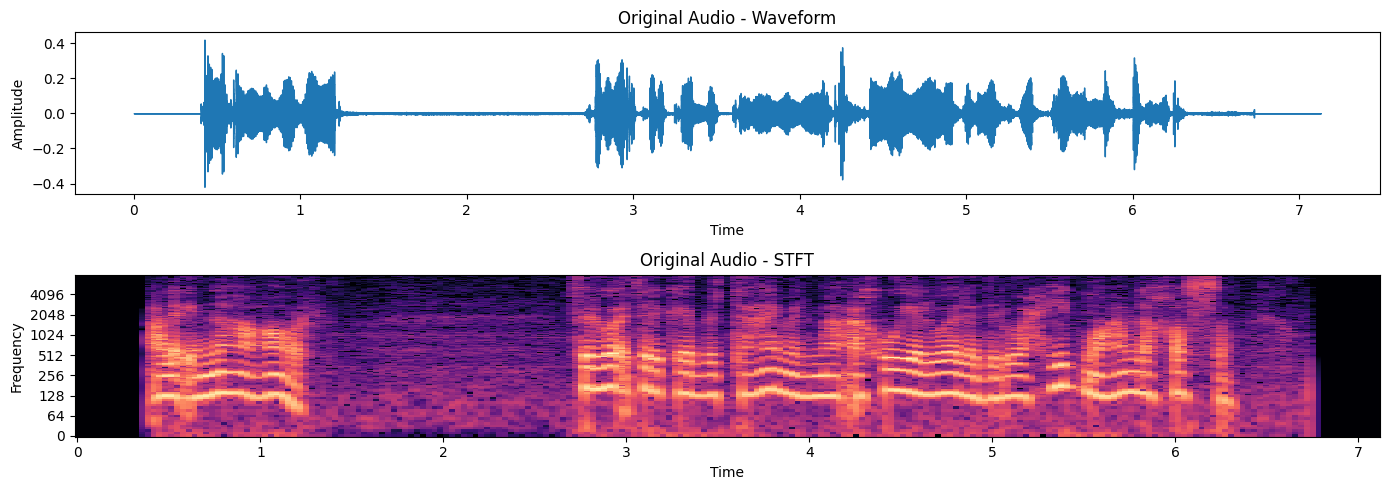

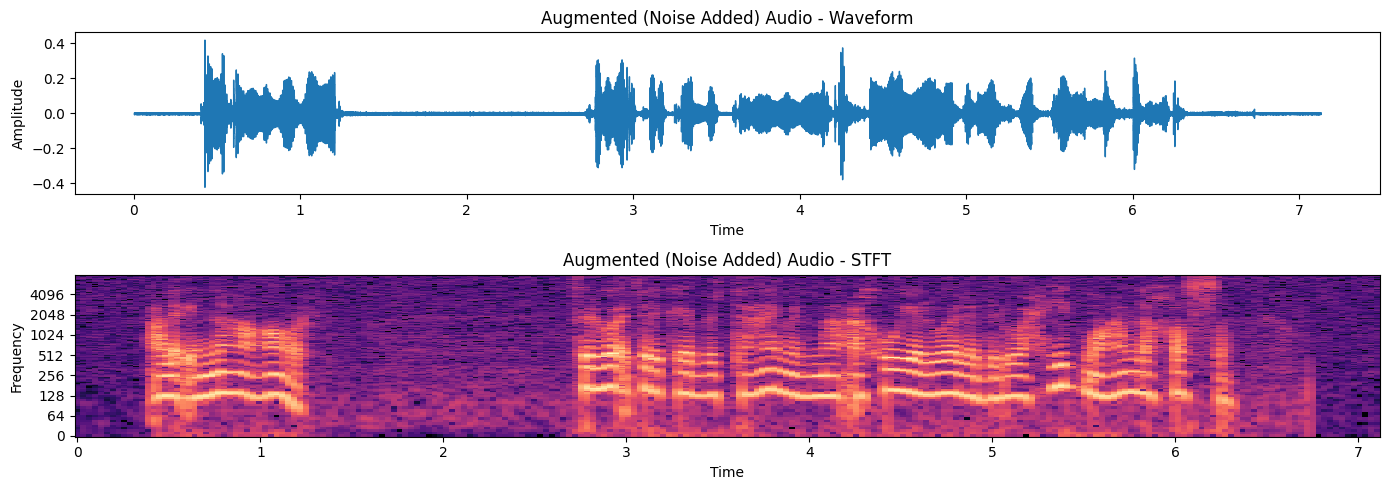

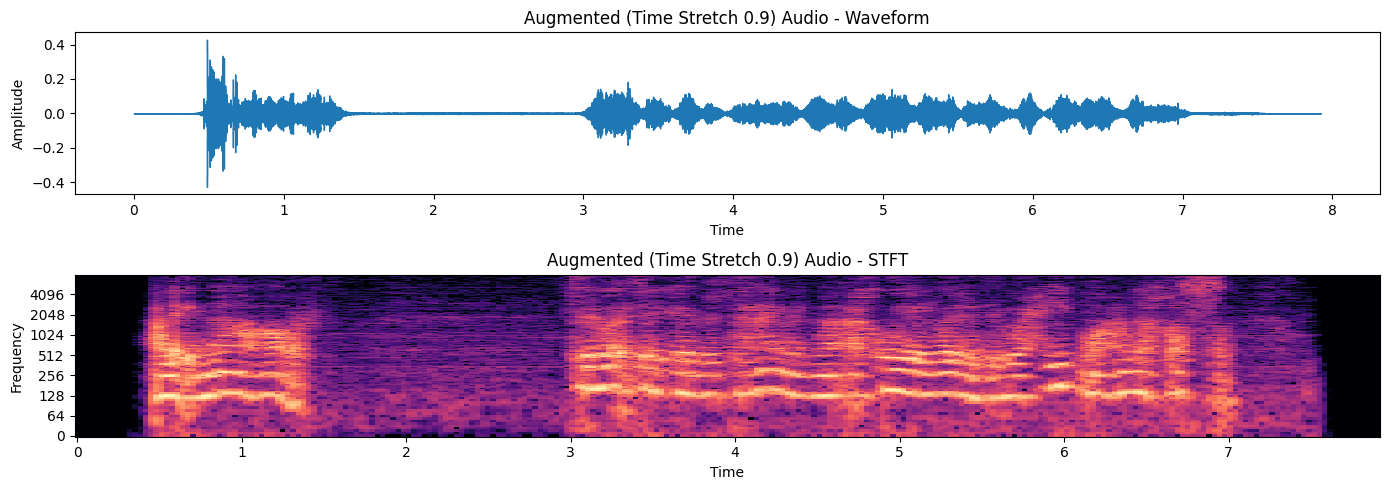

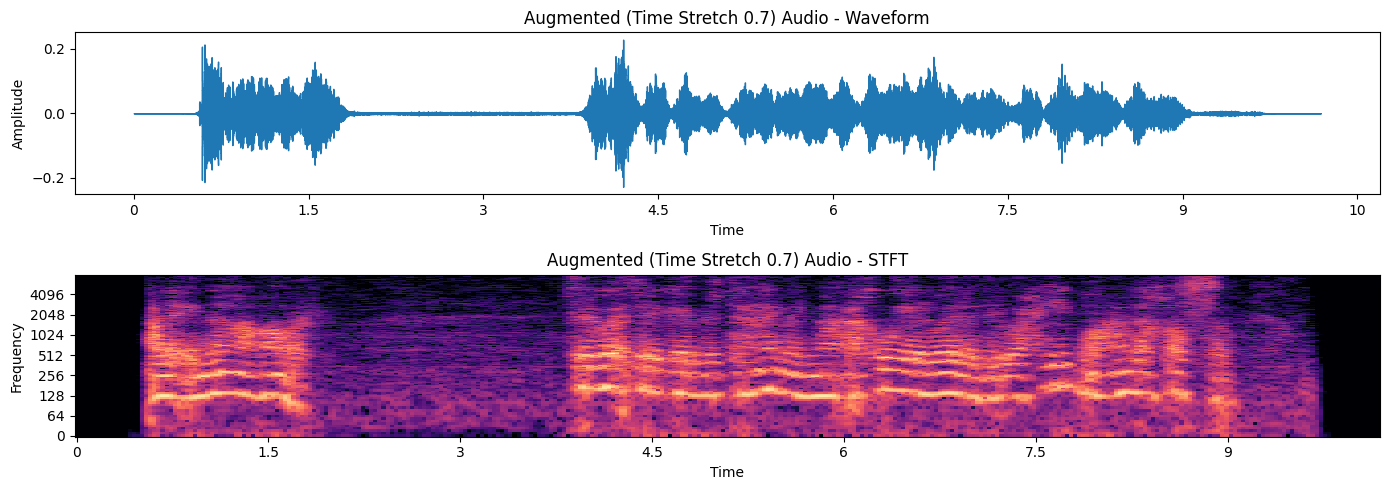

In [39]:
# Plot waveforms and STFT features for the first original and augmented samples
original_audio_id = new_audio_ids[0]
noise_audio_id = new_audio_ids[1]
stretch_audio_id9 = new_audio_ids[2]
stretch_audio_id7 = new_audio_ids[3]

# Load audio files
original_audio_path = os.path.join(output_directory, f'{original_audio_id}.wav')
noise_audio_path = os.path.join(output_directory, f'{noise_audio_id}.wav')
stretch9_audio_path = os.path.join(output_directory, f'{stretch_audio_id9}.wav')
stretch7_audio_path = os.path.join(output_directory, f'{stretch_audio_id7}.wav')

def plot_waveform_stft(audio_path, title):
    # Load audio
    signal, sr = librosa.load(audio_path, sr=None)
    
    # Plot waveform
    plt.figure(figsize=(14, 5))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(signal, sr=sr)
    plt.title(f'{title} - Waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    
    # Plot STFT
    plt.subplot(2, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(f'{title} - STFT')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Plot for original audio
plot_waveform_stft(original_audio_path, 'Original Audio')

# Plot for augmented noise-added audio
plot_waveform_stft(noise_audio_path, 'Augmented (Noise Added) Audio')

# Plot for augmented time-stretched (rate=0.9) audio
plot_waveform_stft(stretch9_audio_path, 'Augmented (Time Stretch 0.9) Audio')

# Plot for augmented time-stretched (rate=0.7) audio
plot_waveform_stft(stretch7_audio_path, 'Augmented (Time Stretch 0.7) Audio')
